# Background: 
Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in over 785 metropolitan areas worldwide with over 110 million users worldwide. Ridesharing is a very volatile market and demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time.

# Objective: 
To extract actionable insights that will enable growth in the market

# Key Questions:
1. What are the different variables that influence pickups?
2. Which factor affects the pickups the most? What could be plausible reasons for that?
3. What are your recommendations to Uber management to capitalize on fluctuating demand?

# Data:
The data contains weather information, location and no. of pickups

* pickup_dt: Date and time of the pick up.
* borough: NYC's borough.
* pickups: Number of pickups for the period.
* spd: Wind speed in miles/hour.
* vsb: Visibility in miles to nearest tenth.
* temp: Temperature in Fahrenheit.
* dewp: Dew point in Fahrenheit.
* slp: Sea level pressure.
* pcp01: 1-hour liquid precipitation.
* pcp06: 6-hour liquid precipitation.
* pcp24: 24-hour liquid precipitation.
* sd: Snow depth in inches.
* hday: Being a holiday (Y) or not (N).

# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Contents:

- <a href = #link1> 1.1 Import the libraries  </a>
- <a href = #link2> 1.2 Load dataset and check shape and variables  </a>
- <a href = #link3> 1.3 Check Statistical summary for all the datasets  </a>
- <a href = #link4> 1.4 Data Pre Processing  </a>
- <a href = #link5> 1.5 EDA  </a>
- <a href = #link6> 1.6 Conclusion and Business Recommendations  </a>

<a id = "link1"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.1 Import the libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id = "link2"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.2 Load dataset and check shape and variables

In [2]:
df_ubr=pd.read_csv('Uber.csv')

In [3]:
df_ubr.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [4]:
df_ubr.shape

(29101, 13)

In [5]:
df_ubr.dtypes

pickup_dt     object
borough       object
pickups        int64
spd          float64
vsb          float64
temp         float64
dewp         float64
slp          float64
pcp01        float64
pcp06        float64
pcp24        float64
sd           float64
hday          object
dtype: object

In [6]:
df_ubr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


##### Observations
* Borough has 26058 observations showing missing values w.r.to others observation. 
* Borough and hday(holiday) are object that should be categorical variables.
* Pickup_dt data type is object that need toe datetime.


<a id = "link3"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.3 Check Statistical summary for all the datasets

In [7]:
df_ubr.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,29101.0,47.669042,19.814969,2.0,32.0,46.0,64.500000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


<a id = "link4"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.4 Data Pre processing

#### Missing value treatment

In [8]:
df_ubr.isna().sum()

pickup_dt       0
borough      3043
pickups         0
spd             0
vsb             0
temp            0
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

In [9]:
df_ubr['borough'].value_counts(dropna=False)

Staten Island    4343
EWR              4343
Queens           4343
Bronx            4343
Brooklyn         4343
Manhattan        4343
NaN              3043
Name: borough, dtype: int64

In [10]:
# Replacing NaN with Unknown
df_ubr['borough'].fillna('Unknown', inplace =True)

In [11]:
df_ubr.borough.value_counts(dropna=0)

Staten Island    4343
EWR              4343
Queens           4343
Bronx            4343
Brooklyn         4343
Manhattan        4343
Unknown          3043
Name: borough, dtype: int64

In [12]:
df_ubr.isnull().sum()

pickup_dt    0
borough      0
pickups      0
spd          0
vsb          0
temp         0
dewp         0
slp          0
pcp01        0
pcp06        0
pcp24        0
sd           0
hday         0
dtype: int64

* No missing values 

### Fixing the data types

In [13]:
df_ubr['pickup_dt']=pd.to_datetime(df_ubr.pickup_dt) # fixing  date time column
df_ubr['borough']=df_ubr.borough.astype('category') # Changing datatype from object tp category
df_ubr['hday']=df_ubr.hday.astype('category') # Changing datatype from object tp category

In [14]:
df_ubr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    29101 non-null  category      
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       29101 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(9), int64(1)
memory usage: 2.5 MB


### Feature  Engineering

In [15]:
# Extracting different date parts from pickup date
df_ubr['Start_Year']=df_ubr.pickup_dt.dt.year
df_ubr['Start_month']=df_ubr.pickup_dt.dt.month_name()
df_ubr['Start_Day']=df_ubr.pickup_dt.dt.day
df_ubr['Start_hour']=df_ubr.pickup_dt.dt.hour
df_ubr['Week_Day']=df_ubr.pickup_dt.dt.day_name()

In [16]:
df_ubr.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,Start_Year,Start_month,Start_Day,Start_hour,Week_Day
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday


In [17]:
# removing pickup_dt colums as it will no longer needed after Feature Engineering
df_ubr.drop('pickup_dt',axis=1,inplace=True)

In [18]:
df_ubr.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,Start_Year,Start_month,Start_Day,Start_hour,Week_Day
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
1,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,1,Thursday


In [19]:
df_ubr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   borough      29101 non-null  category
 1   pickups      29101 non-null  int64   
 2   spd          29101 non-null  float64 
 3   vsb          29101 non-null  float64 
 4   temp         29101 non-null  float64 
 5   dewp         29101 non-null  float64 
 6   slp          29101 non-null  float64 
 7   pcp01        29101 non-null  float64 
 8   pcp06        29101 non-null  float64 
 9   pcp24        29101 non-null  float64 
 10  sd           29101 non-null  float64 
 11  hday         29101 non-null  category
 12  Start_Year   29101 non-null  int64   
 13  Start_month  29101 non-null  object  
 14  Start_Day    29101 non-null  int64   
 15  Start_hour   29101 non-null  int64   
 16  Week_Day     29101 non-null  object  
dtypes: category(2), float64(9), int64(4), object(2)
memory usage: 3.4+ MB

### Fixing the data types

In [20]:
df_ubr['Start_month']=df_ubr.Start_month.astype('category')
df_ubr['Week_Day']=df_ubr.Week_Day.astype('category')

In [21]:
df_ubr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   borough      29101 non-null  category
 1   pickups      29101 non-null  int64   
 2   spd          29101 non-null  float64 
 3   vsb          29101 non-null  float64 
 4   temp         29101 non-null  float64 
 5   dewp         29101 non-null  float64 
 6   slp          29101 non-null  float64 
 7   pcp01        29101 non-null  float64 
 8   pcp06        29101 non-null  float64 
 9   pcp24        29101 non-null  float64 
 10  sd           29101 non-null  float64 
 11  hday         29101 non-null  category
 12  Start_Year   29101 non-null  int64   
 13  Start_month  29101 non-null  category
 14  Start_Day    29101 non-null  int64   
 15  Start_hour   29101 non-null  int64   
 16  Week_Day     29101 non-null  category
dtypes: category(4), float64(9), int64(4)
memory usage: 3.0 MB


<a id = "link5"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.5 EDA

### Univariate analysis

In [22]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    print('Mean: ',np.mean(feature),'\nMedian: ',np.median(feature))


#### Observations on pickups

Mean:  490.2159032335659 
Median:  54.0


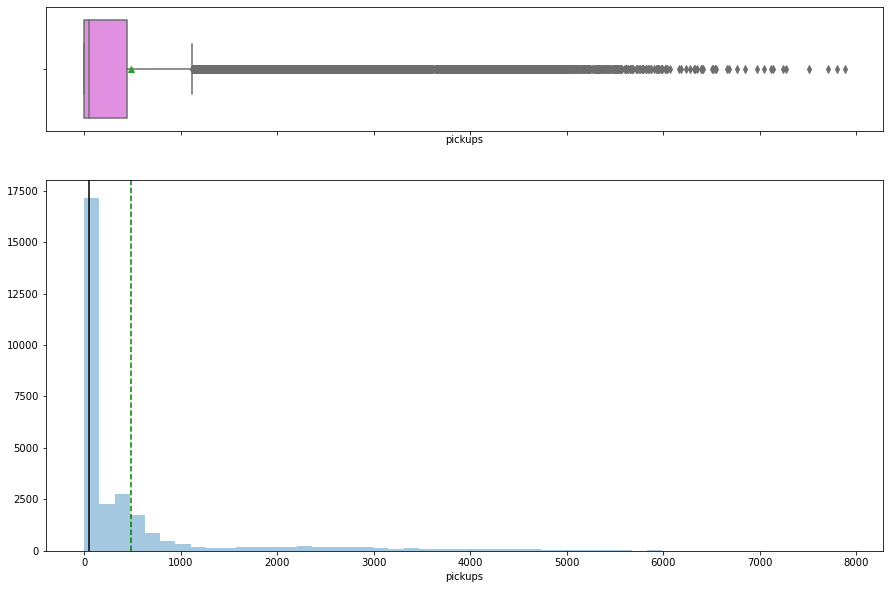

In [23]:
histogram_boxplot(df_ubr.pickups)

#### Observations
* Median pickup is 54 but the mean is close to 500 showing distribution of hourly pickups is highly right skewed
* Majority of the hourly pickups are close to 0
* There are a lot of outliers in this variable. 
* Hourly pickups went as high as 8000


#### Observations on visibility

Mean:  8.818124896706337 
Median:  10.0


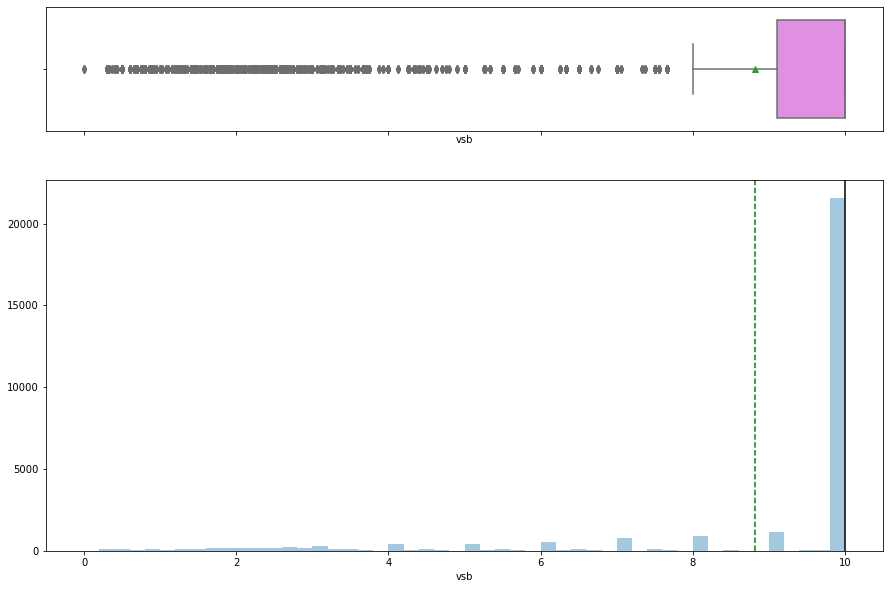

In [24]:
histogram_boxplot(df_ubr.vsb)

#### Observations
* Both the mean and median are high showing that the visibility is good for most of the days.
* Visibility is left skewed.
* There are outliers towards the left indicating poor visibility on some days.
* We have to further analyze the impact of visibility on uber pickup frequency


#### Observations on Tempertaure

Mean:  47.66904205550134 
Median:  46.0


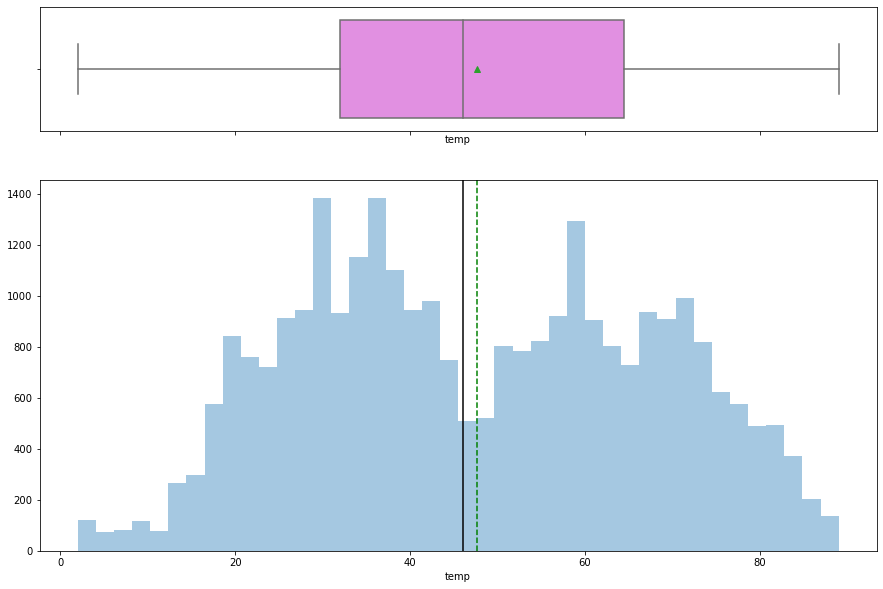

In [25]:
histogram_boxplot(df_ubr.temp)

#### Observations
* We do not see any outliers in temperature. 
* Two peaks observed on the histogram.


#### Observations on Dew point

Mean:  30.82306490858601 
Median:  30.0


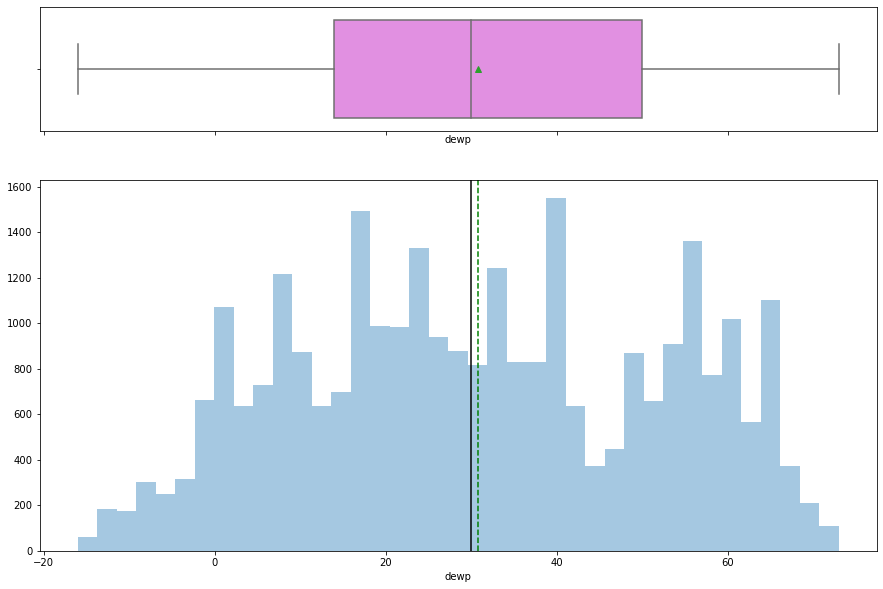

In [26]:
histogram_boxplot(df_ubr.dewp)

#### Observations
* We do not see any outliers in dew point. 
* Mean and median are very close to each other.
* There are several peaks on histogram. Overall, the distribution of dew point is normal.


#### Observations on Sea level pressure

Mean:  1017.8179375279163 
Median:  1018.2


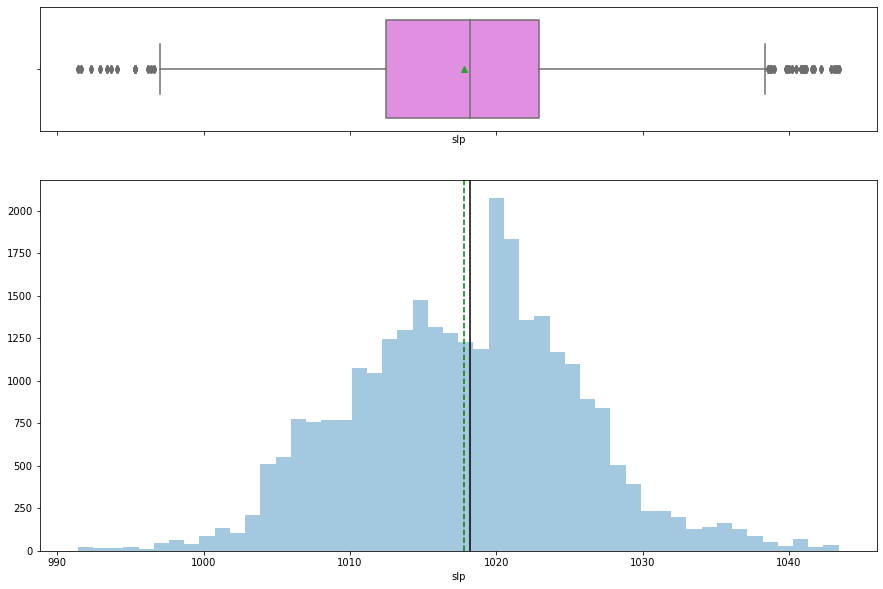

In [27]:
histogram_boxplot(df_ubr.slp)

#### Observations
* Mean and median are very close to each other indicating the normal distribution of the observation.
* There are few outliers present at low and high end.


#### Observations on Precipitation/Rain

##### pcp01: 1-hour liquid precipitation.

Mean:  0.0038301490212249347 
Median:  0.0


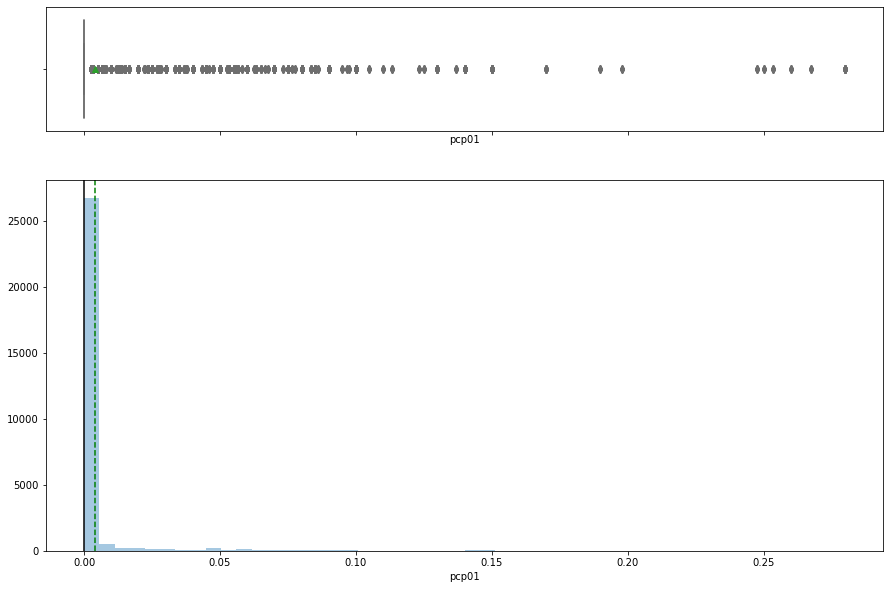

In [28]:
histogram_boxplot(df_ubr.pcp01)

##### pcp06: 6-hour liquid precipitation.

Mean:  0.02612874128036749 
Median:  0.0


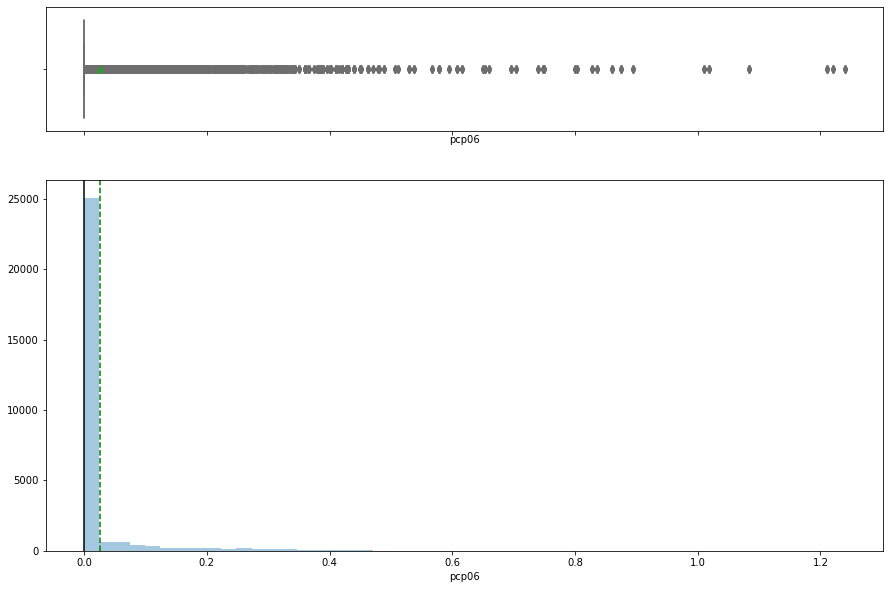

In [29]:
histogram_boxplot(df_ubr.pcp06)

##### pcp24: 24-hour liquid precipitation.

Mean:  0.09046437121290295 
Median:  0.0


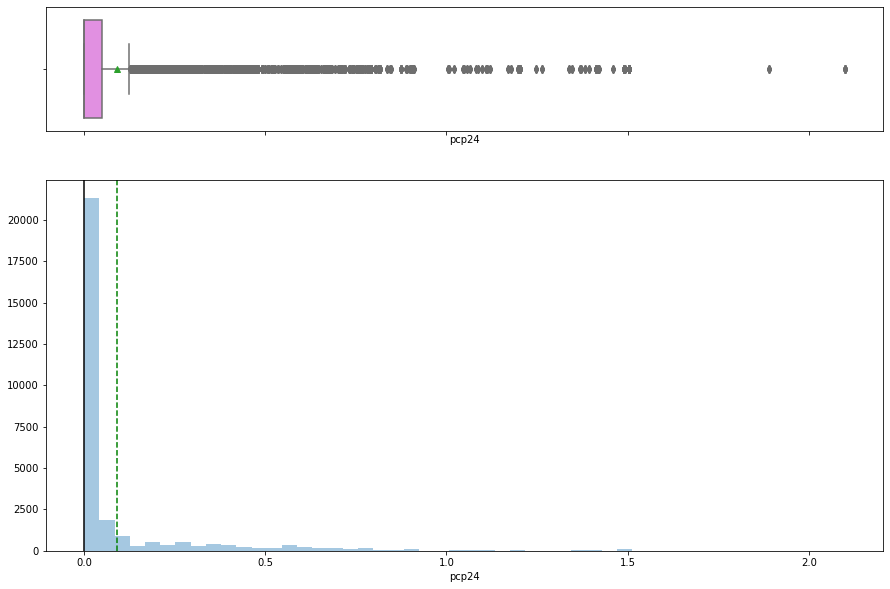

In [30]:
histogram_boxplot(df_ubr.pcp24)

#### Observations
* Mean and median are very small indicating most of the days are dry. It rains on relatively fewer days in New York.
* Observed outliers indicating some times heavy rains.


#### Observations on Snow Depth

Mean:  2.529169243897689 
Median:  0.0
Skewness: 1.5897439776991915


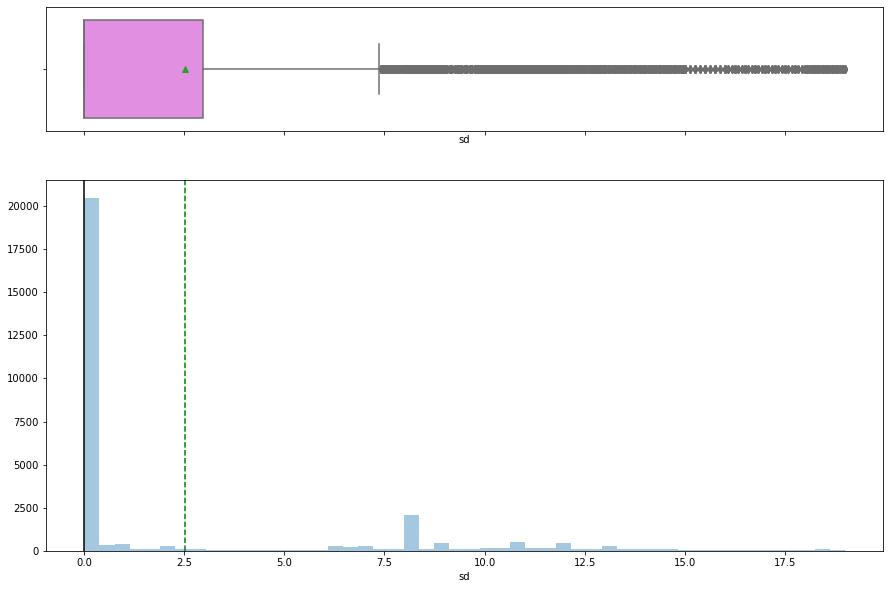

In [31]:
histogram_boxplot(df_ubr.sd)
print('Skewness:',df_ubr['sd'].skew())


#### Observations
* There is snow fall observed and some times it is heavy indicated by outliers.
* We have to further investigate the imp[act of Snow depth on Uber pickups.


### categorical variables 

In [32]:
# Function to create barplots that will indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

#### Observations on holiday

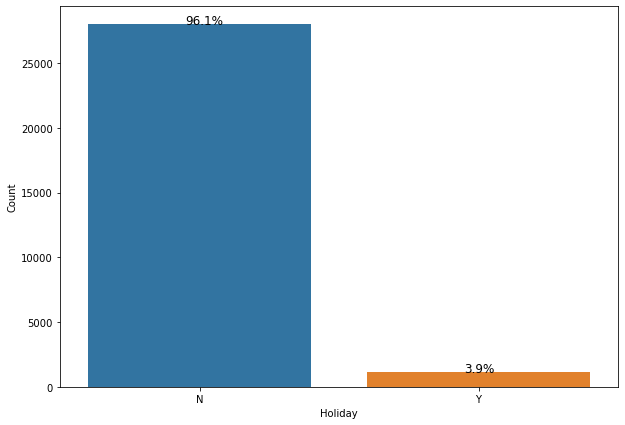

In [33]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df_ubr['hday'])
plt.xlabel('Holiday')
plt.ylabel('Count')
bar_perc(ax,df_ubr['hday'])

In [34]:
pd.crosstab(df_ubr['hday'],df_ubr['hday'] )

hday,N,Y
hday,,
N,27980,0
Y,0,1121


##### Observation
* 1121 of days(3.9%) were holidays

#### Observations on borough

borough,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
borough,,,,,,,
Bronx,4343,0,0,0,0,0,0
Brooklyn,0,4343,0,0,0,0,0
EWR,0,0,4343,0,0,0,0
Manhattan,0,0,0,4343,0,0,0
Queens,0,0,0,0,4343,0,0
Staten Island,0,0,0,0,0,4343,0
Unknown,0,0,0,0,0,0,3043


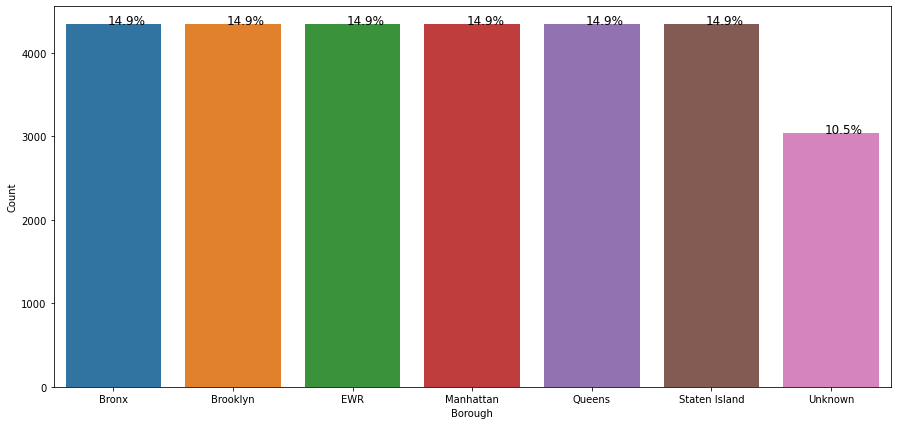

In [35]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_ubr['borough'])
plt.xlabel('Borough')
plt.ylabel('Count')
bar_perc(ax,df_ubr['borough'])
pd.crosstab(df_ubr['borough'],df_ubr['borough'] )

#### Observation
* Borough is showing unform distribution of observation except unknown which is associated with NaN 


## Bivariate Analysis

### Correlation

In [36]:
df_ubr.columns

Index(['borough', 'pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01',
       'pcp06', 'pcp24', 'sd', 'hday', 'Start_Year', 'Start_month',
       'Start_Day', 'Start_hour', 'Week_Day'],
      dtype='object')

In [37]:
df_ubr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   borough      29101 non-null  category
 1   pickups      29101 non-null  int64   
 2   spd          29101 non-null  float64 
 3   vsb          29101 non-null  float64 
 4   temp         29101 non-null  float64 
 5   dewp         29101 non-null  float64 
 6   slp          29101 non-null  float64 
 7   pcp01        29101 non-null  float64 
 8   pcp06        29101 non-null  float64 
 9   pcp24        29101 non-null  float64 
 10  sd           29101 non-null  float64 
 11  hday         29101 non-null  category
 12  Start_Year   29101 non-null  int64   
 13  Start_month  29101 non-null  category
 14  Start_Day    29101 non-null  int64   
 15  Start_hour   29101 non-null  int64   
 16  Week_Day     29101 non-null  category
dtypes: category(4), float64(9), int64(4)
memory usage: 3.0 MB


In [38]:
df_num=df_ubr.select_dtypes(include=['int64','float64'])
df_num.columns

Index(['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06',
       'pcp24', 'sd', 'Start_Year', 'Start_Day', 'Start_hour'],
      dtype='object')

In [39]:
num_var = ['pickups','spd','vsb','temp','dewp', 'slp','pcp01', 'pcp06', 'pcp24', 'sd']
df_corr_var=df_ubr[num_var]

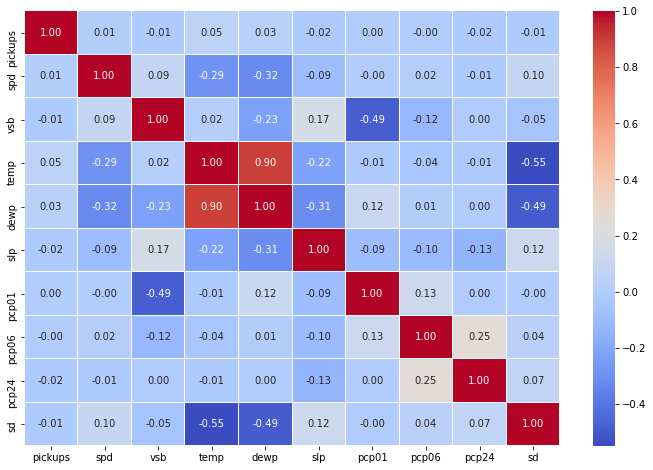

In [40]:
fig,ax = plt.subplots(figsize=(12,8))   
sns.heatmap(df_corr_var.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="coolwarm")
plt.show()

#### Observation
* Wind speed is negatively correlated with temperature and dew point.
* Dew point is negatively correlated with the dew point. 
* Snow depth is negatively correlated with temperature.
* There is no strong correlation between number of pickups and weather.

### Bivariate Scatter Plots

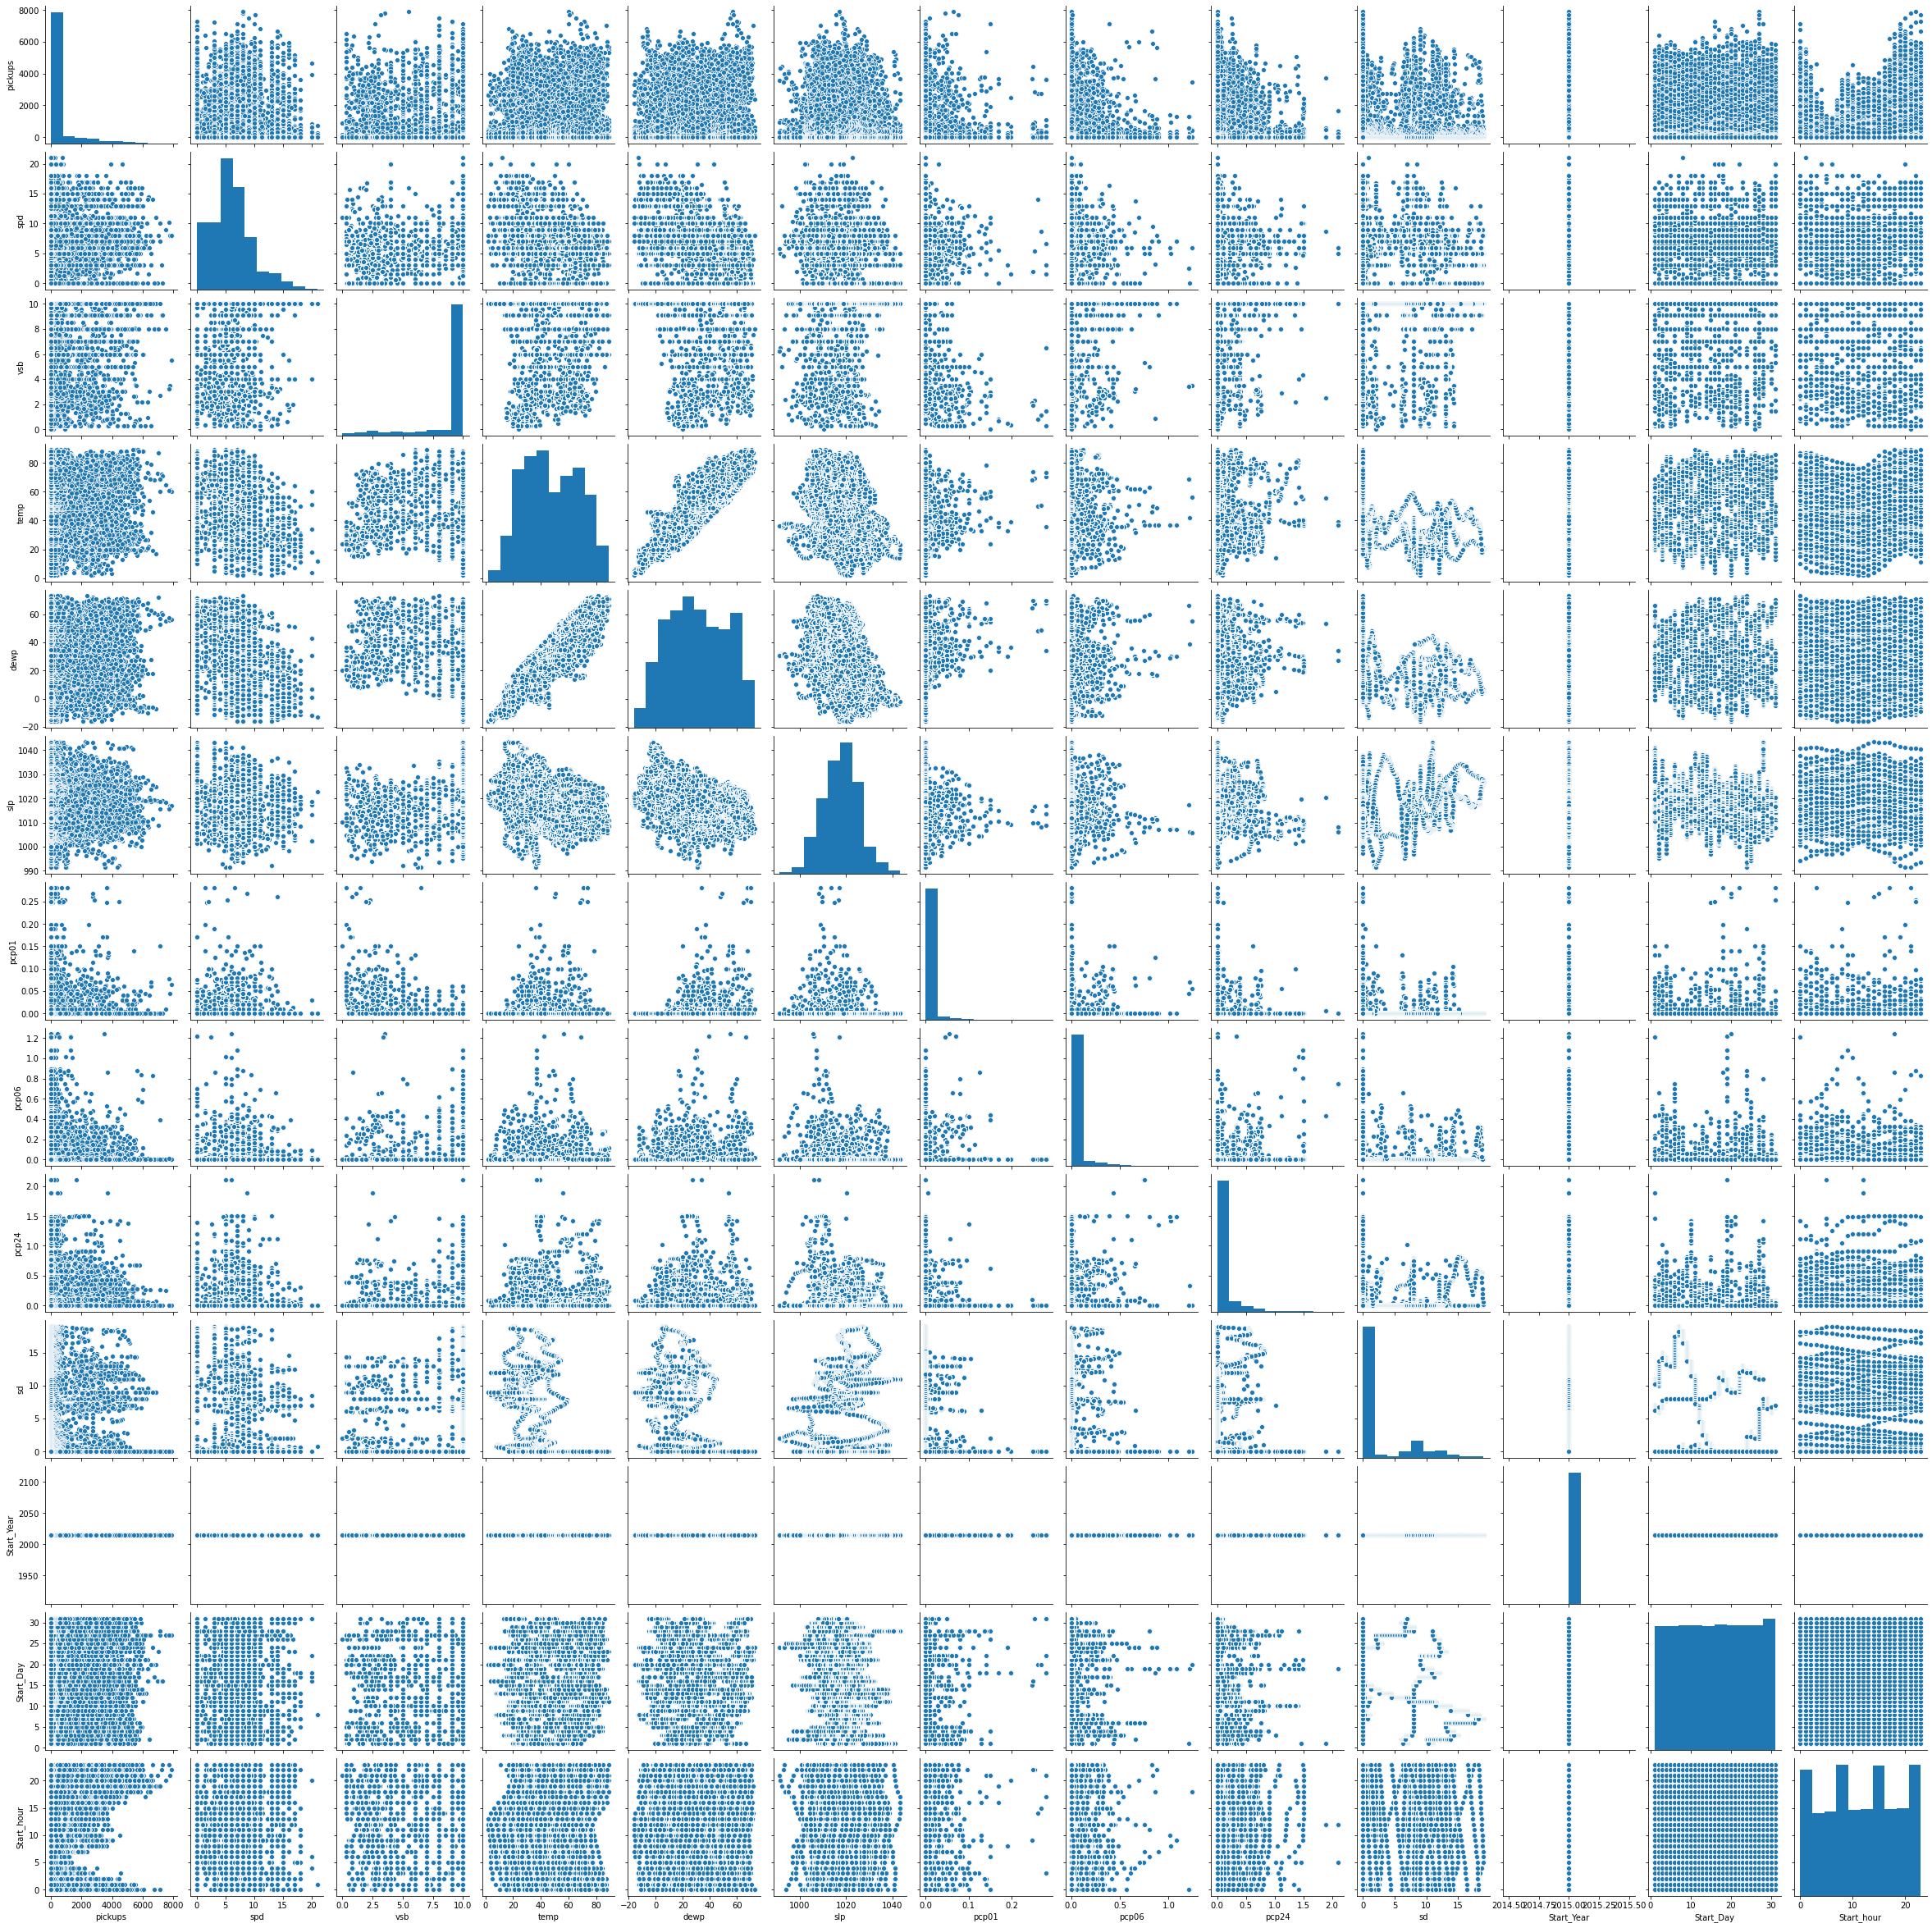

In [41]:
sns.pairplot(df_ubr)

* Linear releationship observed between temperature and dew point.


### Observation on pickups for different time based variables

#### Pickups vs months

In [42]:
df_ubr.groupby(['Start_month'])['pickups'].sum().reset_index()

,Start_month,pickups
0,April,2279842
1,February,2263427
2,January,1947808
3,June,2816348
4,March,2261710
5,May,2696638


In [43]:
cats = df_ubr.Start_month.unique().tolist()
df_ubr.Start_month = pd.Categorical(df_ubr.Start_month, ordered=True, categories=cats)

In [44]:
df_ubr.groupby(['Start_month'])['pickups'].sum().reset_index()

,Start_month,pickups
0,January,1947808
1,February,2263427
2,March,2261710
3,April,2279842
4,May,2696638
5,June,2816348


Text(0.5, 0, 'Month')

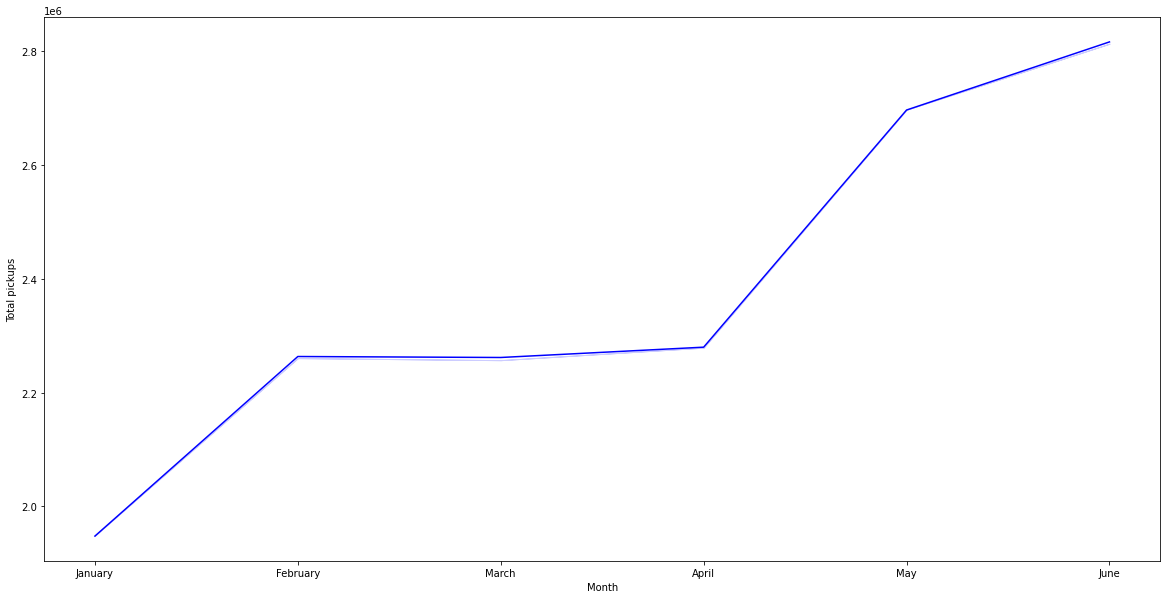

In [45]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Start_month', y='pickups',data=df_ubr,ci=0,estimator='sum',color="BLUE")
plt.ylabel('Total pickups')
plt.xlabel('Month')

#### Observation
* The number of pickups trend is increasing.
* Highest number of pickups are in month of June


#### Pickups vs Days of the Month

In [46]:
df_ubr.groupby(['Start_Day'])['pickups'].sum().reset_index()

,Start_Day,pickups
0,1,462079
1,2,443935
2,3,450206
3,4,412148
4,5,439049
5,6,457547
6,7,472409
7,8,441653
8,9,445884
9,10,467955


Text(0.5, 0, 'Day of Month')

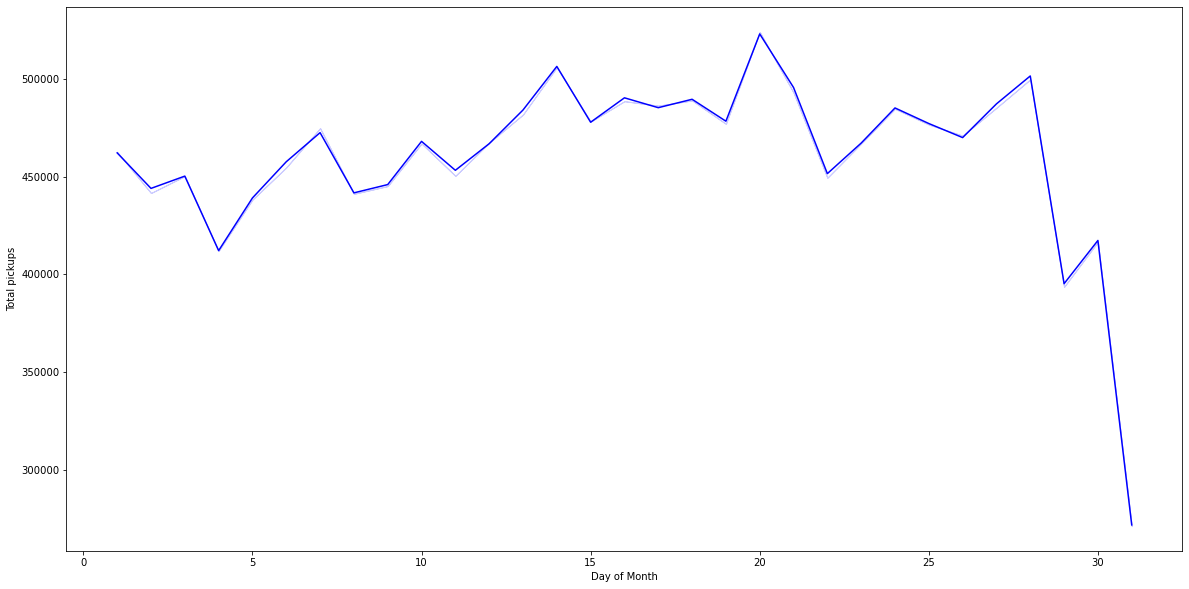

In [47]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Start_Day", y="pickups",estimator='sum',ci=0,data=df_ubr,color="BLUE")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')

#### Observation
* The peak in the booking (total booking=522827) happen on 20th day of the month.
* There is steep fall in the booking after 28th, that can be due to month of February. We can drop Feb to see the impact.


In [48]:
df_ubr_feb_rem=df_ubr[df_ubr['Start_month']!='February']
df_ubr_feb_rem.groupby(['Start_Day'])['pickups'].sum().reset_index()

,Start_Day,pickups
0,1,381780
1,2,373013
2,3,379056
3,4,343882
4,5,357530
5,6,370760
6,7,389741
7,8,375311
8,9,382710
9,10,401987


Text(0.5, 0, 'Day of Month')

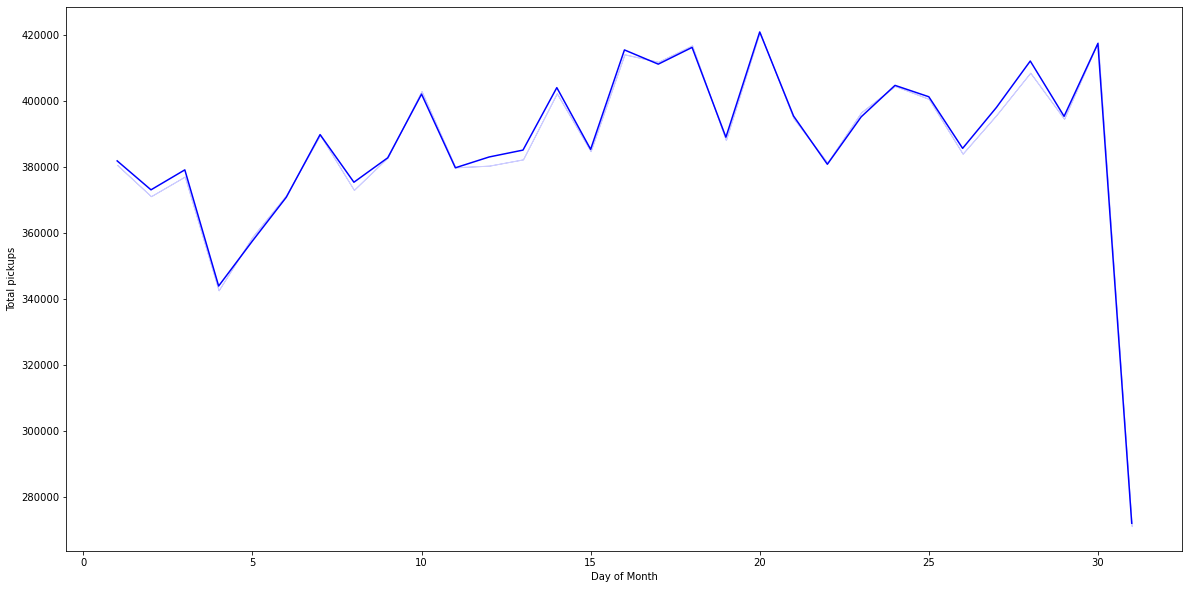

In [49]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Start_Day", y="pickups",estimator='sum',ci=0,data=df_ubr_feb_rem,color="BLUE")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')

* The steep decline observed on 31st as not all month have 31 days.

#### Pickups vs Hour of Day

Text(0.5, 0, 'Hour of the day')

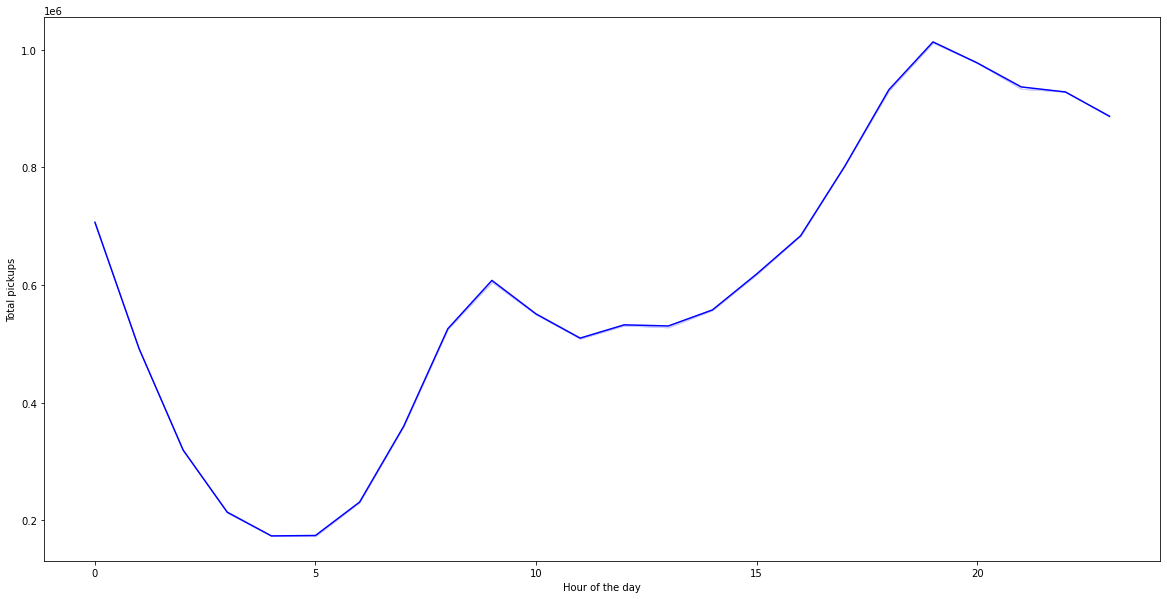

In [50]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Start_hour", y="pickups",estimator='sum',ci=0,data=df_ubr,color="BLUE")
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')

#### Observation
* The number of pickups increasing from 5am till 10 am and then 19th to 20th hours of the day that could be related to the office rush hour.
* The peak at 199th to 20th hours of the day could be related to the workforce leaving the office.


#### Pickups across Weekdays

In [51]:
df_ubr.groupby(['Week_Day'])['pickups'].sum().reset_index()

,Week_Day,pickups
0,Friday,2261480
1,Monday,1698122
2,Saturday,2410063
3,Sunday,2004315
4,Thursday,2140072
5,Tuesday,1864578
6,Wednesday,1887143


In [52]:
cat = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df_ubr.Week_Day = pd.Categorical(df_ubr.Week_Day, ordered=True, categories=cat)

In [53]:
df_ubr.groupby(['Week_Day'])['pickups'].sum().reset_index()

,Week_Day,pickups
0,Monday,1698122
1,Tuesday,1864578
2,Wednesday,1887143
3,Thursday,2140072
4,Friday,2261480
5,Saturday,2410063
6,Sunday,2004315


Text(0.5, 0, 'Weeks')

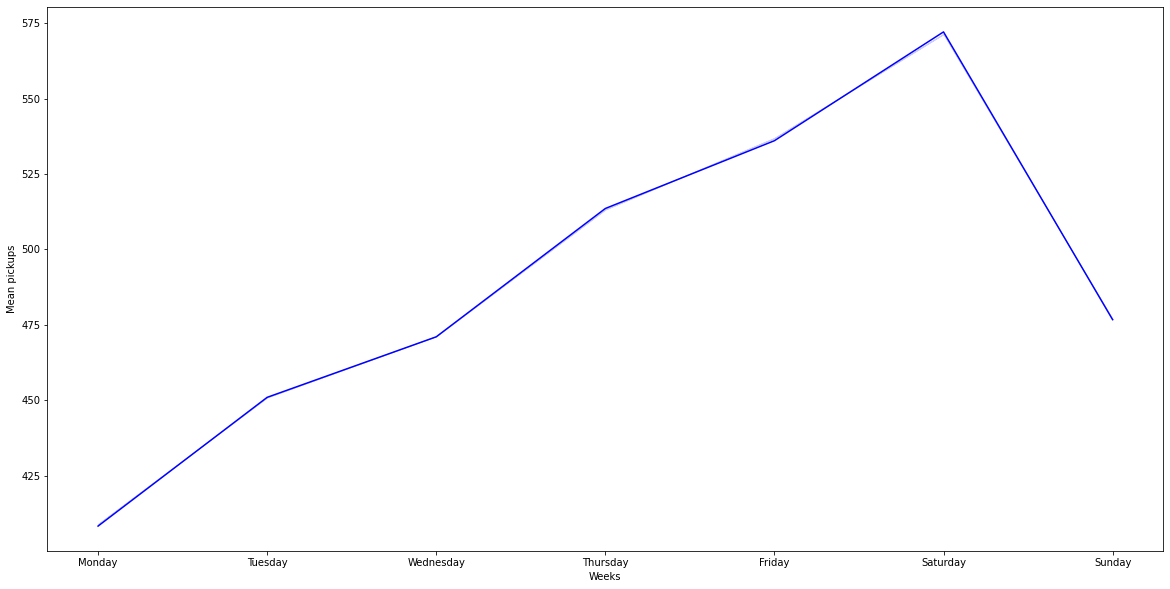

In [54]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Week_Day", y="pickups",ci=0,data=df_ubr,color="BLUE")
plt.ylabel('Mean pickups')
plt.xlabel('Weeks')


#### Observation
* Pickups linearly increasing from Monday to Saturday and then drop on Sunday.

#### Pickups across Borough

In [55]:
df_ubr.groupby(['borough'])['pickups'].sum().sort_values(ascending=False).reset_index()

,borough,pickups
0,Manhattan,10367841
1,Brooklyn,2321035
2,Queens,1343528
3,Bronx,220047
4,Staten Island,6957
5,Unknown,6260
6,EWR,105


In [56]:
df_ubr.groupby(['borough'])['pickups'].mean().sort_values(ascending=False).reset_index()

,borough,pickups
0,Manhattan,2387.253281
1,Brooklyn,534.431269
2,Queens,309.354824
3,Bronx,50.667050
4,Unknown,2.057180
5,Staten Island,1.601888
6,EWR,0.024177


Text(0.5, 0, 'Borough')

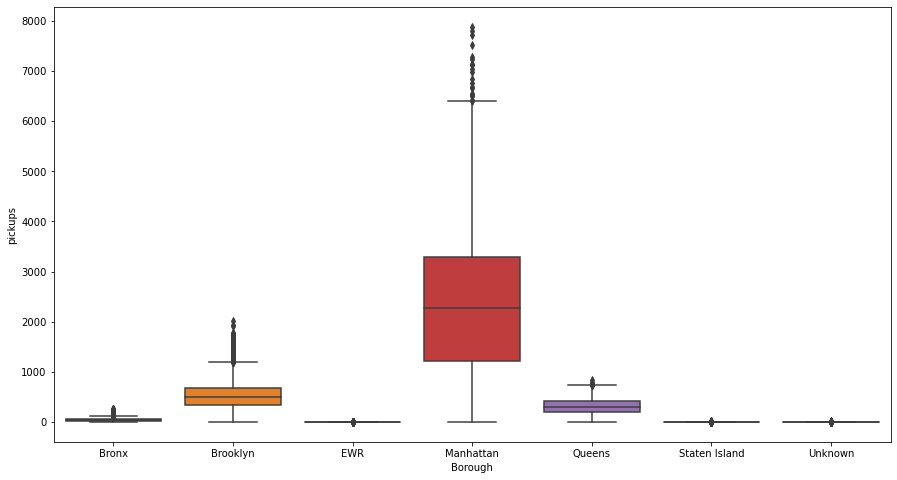

In [57]:
plt.figure(figsize=(15,8))           
sns.boxplot(df_ubr['borough'],df_ubr['pickups'])
plt.ylabel('pickups')
plt.xlabel('Borough')

#### Observation:
* Manhattan have the highest number of pickups
* Brooklyn and Queens also have decent pickups.
* Staten Island and Unknown have smaller number of pickups however pickups demand at EWR is extremely low.


#### Pickups during holiday

In [58]:
df_ubr.groupby('hday')['pickups'].sum().reset_index()

,hday,pickups
0,N,13775672
1,Y,490101


In [59]:
df_ubr.groupby('hday')['pickups'].mean().reset_index()

,hday,pickups
0,N,492.339957
1,Y,437.199822


In [60]:
df_ubr.groupby(by = ['borough','hday'])['pickups'].mean()

borough        hday
Bronx          N         50.771073
               Y         48.065868
Brooklyn       N        534.727969
               Y        527.011976
EWR            N          0.023467
               Y          0.041916
Manhattan      N       2401.302921
               Y       2035.928144
Queens         N        308.899904
               Y        320.730539
Staten Island  N          1.606082
               Y          1.497006
Unknown        N          2.057456
               Y          2.050420
Name: pickups, dtype: float64

#### Observation:
* Mean pickup during holiday is smaller than regular business day.
* Except Manhattan mean pickup during holidays is very similar to regular business day.
* EWR has negligible pickups.


## Multivariate Analysis

#### Relationship of Pickups vs Hour of Day across borough

Text(0.5, 0, 'Hour of the day')

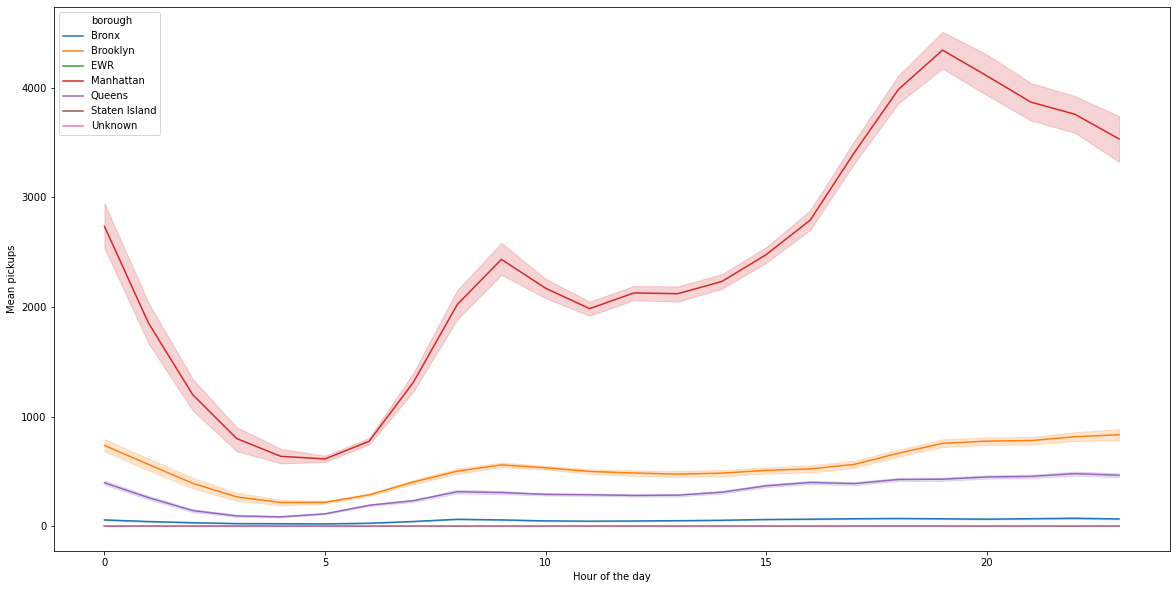

In [61]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Start_hour", y="pickups", ci=95, data=df_ubr, hue='borough')
plt.ylabel('Mean pickups')
plt.xlabel('Hour of the day')

* The above plot is dominated by the Manhatten pickups.We can convert pickup to logarithamic scale and replot.

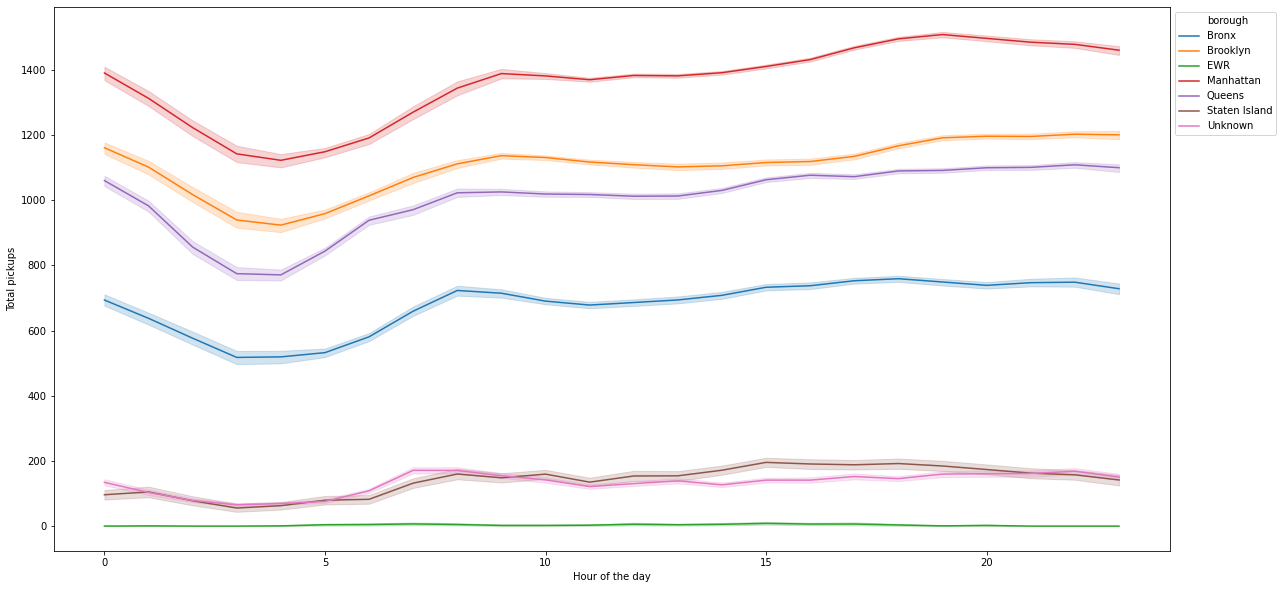

In [62]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df_ubr.Start_hour, y=np.log1p(df_ubr.pickups), estimator='sum', ci=95, hue=df_ubr.borough)
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.legend(bbox_to_anchor=(1, 1))

#### Observation:
* Pickup pattern is very similar across four major borough.
* Majority of the pickups for EWR is close to zero with few random demands.
* Manhattan have the highest number of pickups.


#### Manhattan Pickups Heatmap 

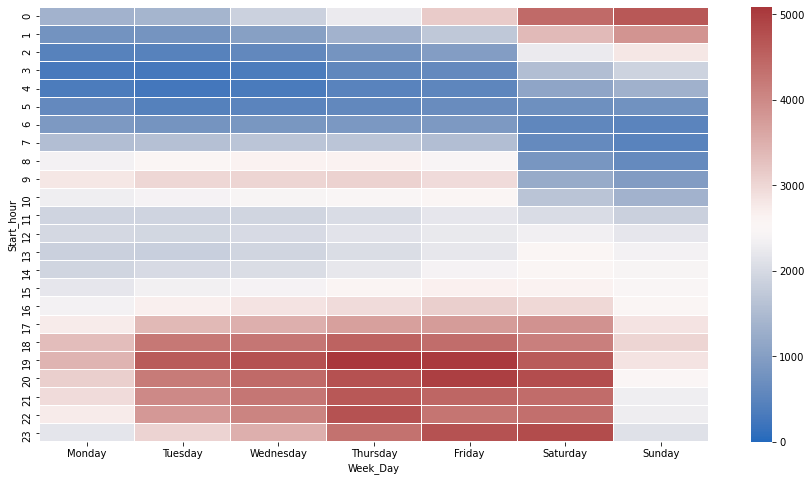

In [63]:
df_ubr_man = df_ubr[df_ubr.borough=='Manhattan']
df_ubr_4hm =df_ubr_man.pivot_table(index = 'Start_hour',columns ='Week_Day',values ='pickups')
# Draw a heatmap 
plt.figure(figsize = (15,8)) # To resize the plot
sns.heatmap(df_ubr_4hm,  fmt="d", cmap='vlag', linewidths=.05, vmin=0)

#### Observation
* Uber pickups is high during evening that could be related with the people returning to home from office. Monday is exception here
* Uber pickup demands is high at late night on Friday and Saturday.


#### Brooklyn Pickups Heatmap 

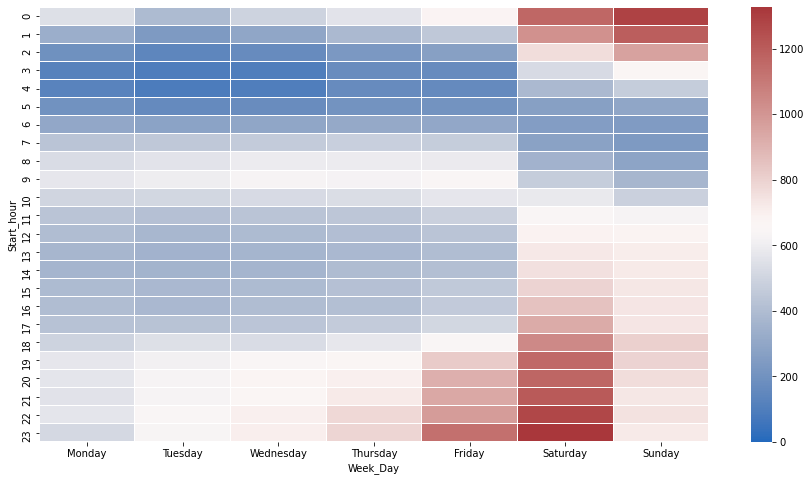

In [64]:
df_ubr_brk = df_ubr[df_ubr.borough=='Brooklyn']
df_ubr_brk_4hm =df_ubr_brk.pivot_table(index = 'Start_hour',columns ='Week_Day',values ='pickups')
# Draw a heatmap 
plt.figure(figsize = (15,8)) # To resize the plot
sns.heatmap(df_ubr_brk_4hm,  fmt="d", cmap='vlag', linewidths=.05, vmin=0)

* Late hours pickup in Brooklyn on Friday and Saturday night is more. 

<a id = "link6"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.6 Conclusion and Business Recommendations

### Conclusions
* The demand of pickups increasing month over month.
* The majority of the riders are from the Manhattan area.
* Weather condition does not have any impact on pickups.
* The pickup demand is high during evening which can be related to the people returning back from office.
* Late hour pickup is higher on Friday and Saturday.

### Business Recommendations
* Manhattan is very important to maintain the revenue as the market is more mature there.
* Bronx and Brooklyn have the potential for market share growth.
* The number of users increasing month over month and this trend need to be maintained.
* The number of pickups is higher during evening office hours and late Saturday evening and company need to make sure the cab availability to fulfill the demand.

